## Adult Dataset

Classification problem about how much people gain income [>50K, <=50K].

年齢, 職業階級, fnlwgt, 最終学歴, 教育を受けた年数, 配偶者との状況, 職業分類, 親族との関係, 人種, 性別, 投資利益, 投資損失, 労働時間/週, 国籍

[fnlwgtについて](http://www.nber.org/sipp/2008/chap8rev2008.pdf)


### columns
- age: continuous
- workclass: category [Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked]
- fnlwgt: continuous
- education: category [Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool]
- education-num: continuous
- material-status: category [Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse]
- occupation: category [Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces]
- relationship: category [Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried]
- race: category [White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black]
- sex: category [Male, Female]
- capital-gain: continuous
- capital-loss: continuous
- hours-per-week: continuous
- native-country: category [United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands]

income: [>50K, <=50K]

欠損値はなし


### Methods
- least squares classification
- perceptron
- logistic regression

In [1]:
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
np.random.seed(seed=0)

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'material_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
categorical_columns = ['workclass', 'education', 'material_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
numerical_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

df = pd.read_csv('./datasets/adult/adult.data', header=None)
df.columns = columns

X = df.loc[:, ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'material_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]
y = df.loc[:, ['income']]
y[y['income'] == " <=50K"] = 0.0
y[y['income'] == " >50K"] = 1.0
y = np.ravel(y).astype(np.float64)

X.head()

,age,workclass,fnlwgt,education,education_num,material_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [3]:
ohe = ce.OneHotEncoder(cols=categorical_columns)
ohe_X = ohe.fit_transform(X)
ohe_X = ohe_X.astype(np.float64)

stdsc = StandardScaler()
std_X = stdsc.fit_transform(ohe_X)

In [48]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def gradient(x, theta, beta, y_true):
    error = y_true - sigmoid(np.dot(x, theta) + beta) 
    theta_grad = -np.mean(x.T * error, axis=1)
    beta_grad = -np.mean(error)
    return theta_grad, beta_grad

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y_pred, y_true):
    delta = 1e-16
    return -np.sum(y_true * np.log(y_pred + delta))

def mean_squared_error(y_pred, y_true):
    return 0.5 * np.sum((y_pred - y_true)**2)

### ロジスティック回帰の実装

$$
y = \frac{1}{1 + \exp{(-\theta x + \beta)}}
$$

In [64]:
beta = np.random.rand()
train_X = np.array(std_X, dtype=np.float64)

eta = 0.01
epoch = 5000
theta = np.random.rand(train_X.shape[1])

y_pred_pre = np.dot(train_X, theta) + beta
tt = np.sum(y[y_pred_pre >= 0] == 1)
ft = np.sum(y[y_pred_pre >= 0] == 0)
tf = np.sum(y[y_pred_pre < 0] == 0)
ff = np.sum(y[y_pred_pre < 0] == 1)

print(tt, ft, ff, tf)
print((tt + tf)/(tt + ft + ff + tf))

error_x = [0]
error_y = [mean_squared_error(y_pred_pre, y)]
for i in range(epoch):
    theta_grad, beta_grad = gradient(train_X, theta, beta, y)
    theta -= eta*theta_grad
    beta -= eta*beta_grad
    
    y_pred = sigmoid(np.dot(train_X, theta) + beta)
    err = mean_squared_error(y_pred, y)
    error_x.append(i + 1)
    error_y.append(err)

3532 12013 4309 12707
0.4987254691194988


In [65]:
y_pred = np.dot(train_X, theta) + beta

tt = np.sum(y[y_pred >= 0] == 1)
ft = np.sum(y[y_pred >= 0] == 0)
tf = np.sum(y[y_pred < 0] == 0)
ff = np.sum(y[y_pred < 0] == 1)

print(tt, ft, ff, tf)
print((tt + tf)/(tt + ft + ff + tf))

4689 1697 3152 23023
0.8510795122999908


336161.1849680488 1686.5154868429636


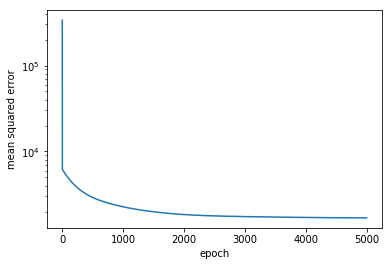

In [69]:
print(error_y[0], error_y[-1])
plt.plot(error_x, error_y)
plt.yscale('log')
plt.ylabel('mean squared error')
plt.xlabel('epoch')

plt.savefig('error.png')

### パーセプトロンの実装
3層のニューラルネットワークを実装する


ValueError: shapes (32561,) and (216,) not aligned: 32561 (dim 0) != 216 (dim 0)

-2.3025850929940455